#### Objective of the Project:
To identify the causes and to develop a system to predict heart attack in an effective manner. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

#### Data set names
data.xlsx

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline
sns.set_style("whitegrid")
#plt.style.use("fivethirtyeight")

#### Load the data

In [2]:
df_data = pd.read_excel("data.xlsx")

In [3]:
df_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Understanding, and Inspecting Data:

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 1. Checking for null values in the dataframe

In [5]:
df_data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

#### There are no null values in the data. 

#### 2. Dropping the duplicate values if any

In [6]:
df_data.drop_duplicates()
df_data.shape

(303, 14)

#### There are no duplicate values in the data.

#### 3. Statistical Summary of Data

In [7]:
pd.set_option("display.float", "{:.3f}".format)
df_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


##### Calculating the median

In [8]:
df_data.median()

age         55.000
sex          1.000
cp           1.000
trestbps   130.000
chol       240.000
fbs          0.000
restecg      1.000
thalach    153.000
exang        0.000
oldpeak      0.800
slope        1.000
ca           0.000
thal         2.000
target       1.000
dtype: float64

##### Calculating the mode

In [9]:
df_data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.000,1.000,0.000,120.000,197,0.000,1.000,162.000,0.000,0.000,2.000,0.000,2.000,1.000
1,nan,nan,nan,nan,204,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,234,nan,nan,nan,nan,nan,nan,nan,nan,nan


##### For Cholesterol there are 3 mode values.

#### 4. Replace the column names with more meaningful names

In [10]:
old_col_names = df_data.columns
new_col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target']

In [11]:
for i in range(0,old_col_names.size):
    df_data.rename(columns = {old_col_names[i]:new_col_names[i]}, inplace = True)

In [12]:
df_data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

#### 5. Identifying the categorical and continuous data values

In [13]:
# The columns which are having less than or equal to 5 unique values are considered as 
# Categorical variables.
cat_cols = []
cont_cols = []
for column in df_data.columns:
    if len(df_data[column].unique()) <= 5:
        cat_cols.append(column)
    else:
        cont_cols.append(column)

In [14]:
cat_cols

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_induced_angina',
 'st_slope',
 'major_vessels',
 'thalessimia',
 'target']

In [15]:
cont_cols

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate',
 'st_depression']

#### 6. Plotting the distribution of Categorical values

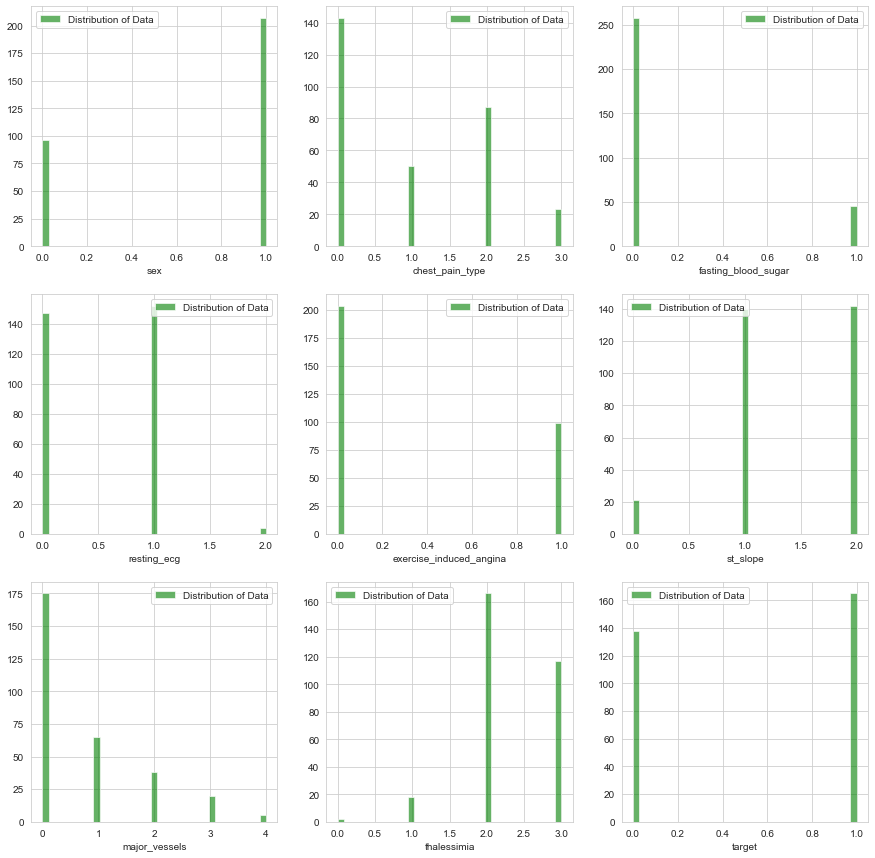

In [16]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    df_data[column].hist(bins=35, color='green',label='Distribution of Data', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

#### 7. Plotting the distribution of Continuous values. 

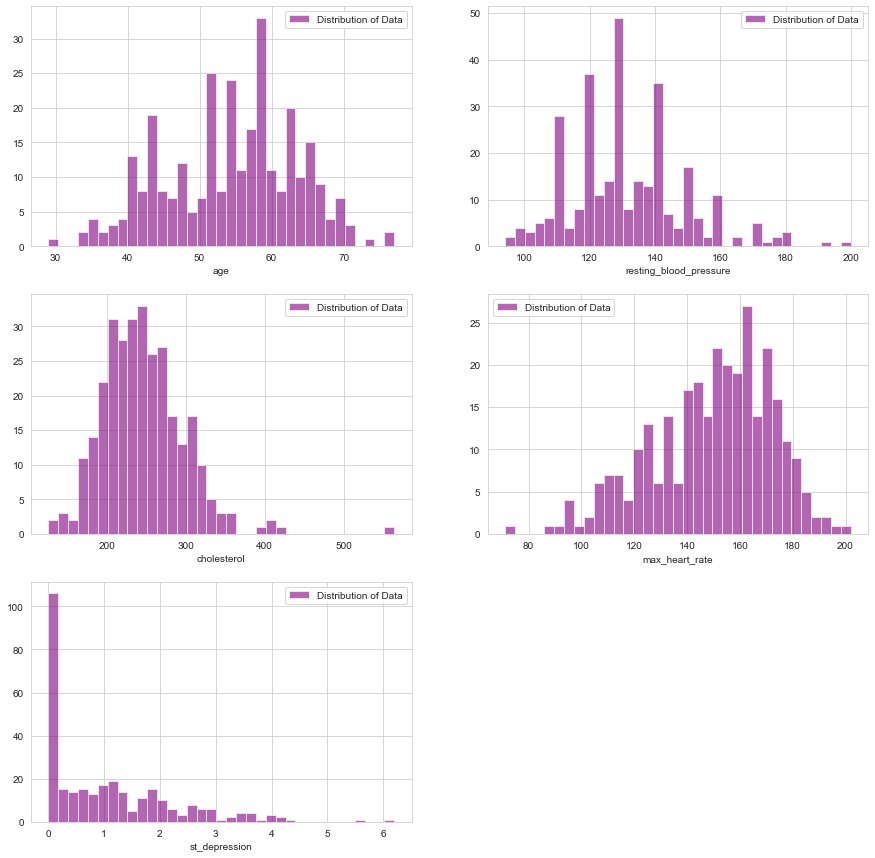

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_cols, 1):
    plt.subplot(3, 2, i)
    df_data[column].hist(bins=35, color='purple', label='Distribution of Data', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Exploratory Data Analysis

#### 8. Checking the Distribution of target column in the Data 

In [18]:
df_data.loc[df_data.target == 0 , 'target'] = 'Disease-' 
df_data.loc[df_data.target == 1 , 'target'] = 'Disease+' 

In [19]:
df_data['target'].value_counts()

Disease+    165
Disease-    138
Name: target, dtype: int64

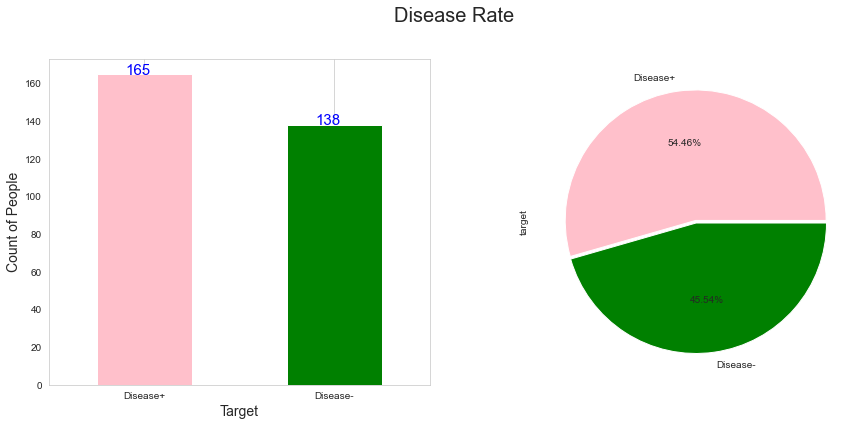

In [20]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.suptitle("Disease Rate", fontsize=20, y=1.0)
plt.subplot(1, 2, 1) 
ax = df_data['target'].value_counts().plot(kind='bar', figsize=(15, 6), 
                                           color=['pink','green'])
plt.grid(axis = 'y')
plt.xticks(rotation=0)
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count of People", fontsize=14)
plt.subplot(1, 2, 2) 
df_data['target'].value_counts().plot(kind = 'pie', autopct='%1.2f%%', 
                                      colors = ['pink', 'green'],
                                      explode=[0.01, 0.01])

for i in ax.patches:
      ax.text(i.get_x() + 0.15, i.get_height(), 
            str(i.get_height()), fontsize=15,
                color='blue')

#### 9. Changing the values of Categorical Data from Numeric to String for better understanding

In [21]:
df_data.loc[df_data.sex == 0 , 'sex'] = 'female' 
df_data.loc[df_data.sex == 1 , 'sex'] = 'male' 

In [22]:
df_data.loc[df_data.fasting_blood_sugar == 0 , 'fasting_blood_sugar'] = '<120mg/ml' 
df_data.loc[df_data.fasting_blood_sugar == 1 , 'fasting_blood_sugar'] = '>120mg/ml' 

In [23]:
df_data.loc[df_data.resting_ecg == 0 , 'resting_ecg'] = 'abnormal' 
df_data.loc[df_data.resting_ecg == 1 , 'resting_ecg'] = 'normal' 
df_data.loc[df_data.resting_ecg == 2 , 'resting_ecg'] = 'hyper' 

In [24]:
df_data.loc[df_data.thalessimia == 1 , 'thalessimia'] = 'normal' 
df_data.loc[df_data.thalessimia == 2 , 'thalessimia'] = 'fixed defect' 
df_data.loc[df_data.thalessimia == 3 , 'thalessimia'] = 'reversable defect' 

In [25]:
df_data.loc[df_data.st_slope == 0 , 'st_slope'] = 'unsloping' 
df_data.loc[df_data.st_slope == 1 , 'st_slope'] = 'flat' 
df_data.loc[df_data.st_slope == 2 , 'st_slope'] = 'downsloping' 

In [26]:
df_data.loc[df_data.chest_pain_type == 0 , 'chest_pain_type'] = 'typical angina' 
df_data.loc[df_data.chest_pain_type == 1 , 'chest_pain_type'] = 'atypical angina' 
df_data.loc[df_data.chest_pain_type == 2 , 'chest_pain_type'] = 'non-anginal pain' 
df_data.loc[df_data.chest_pain_type == 3 , 'chest_pain_type'] = 'asymptomatic' 

In [27]:
df_data.loc[df_data.exercise_induced_angina == 0 , 'exercise_induced_angina'] = 'no' 
df_data.loc[df_data.exercise_induced_angina == 1 , 'exercise_induced_angina'] = 'yes' 

#### 10. Checking the distribution of the Categorical Variables

In [28]:
# function for bar plot of categorical columns
def count_plot_col(column):
    df_data[column].value_counts().plot(kind='bar', figsize=(6, 4))
    plt.xticks(rotation=0)
    plt.xlabel(column)
    plt.ylabel('Counts')
    str = 'Distribution of ' + column
    plt.title(str)

#### Distribution of gender

In [29]:
df_data['sex'].value_counts()

male      207
female     96
Name: sex, dtype: int64

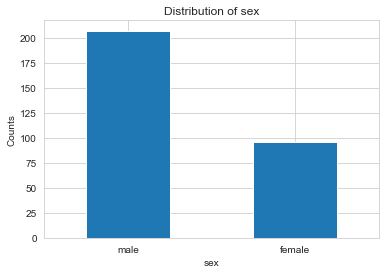

In [30]:
count_plot_col('sex')

##### Number of males are more than females

#### Distribution of Fasting Blood Sugar

In [31]:
df_data['fasting_blood_sugar'].value_counts()

<120mg/ml    258
>120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

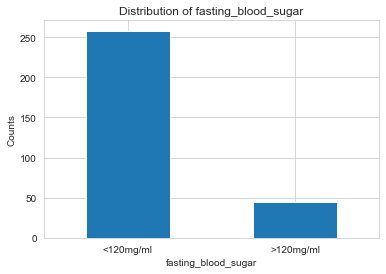

In [32]:
count_plot_col('fasting_blood_sugar')

##### Fasting Blood Sugar is less than 120mg/ml for majority of the people.

#### Distribution of Resting ECG

In [33]:
df_data['resting_ecg'].value_counts()

normal      152
abnormal    147
hyper         4
Name: resting_ecg, dtype: int64

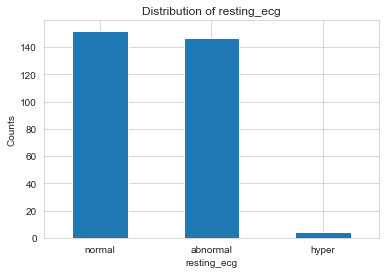

In [34]:
count_plot_col('resting_ecg')

##### Almost same number of people are having normal and abnormal Resting ECG.

#### Distribution of Thalessimia

In [35]:
df_data['thalessimia'].value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalessimia, dtype: int64

##### There are 2 data values where the value of Thalessimia is 0, which is not the expected value. 
##### As per our analysis, we are replacing the value with 2 as that is the mean value of the column.

In [36]:
df_data.loc[df_data.thalessimia==0 , 'thalessimia'] = 'fixed defect'

In [37]:
df_data['thalessimia'].value_counts()

fixed defect         168
reversable defect    117
normal                18
Name: thalessimia, dtype: int64

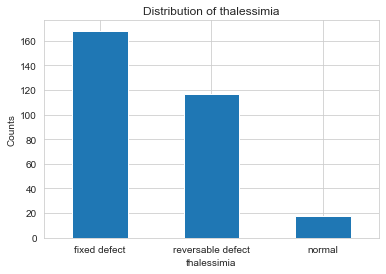

In [38]:
count_plot_col('thalessimia')

##### Most people are having fixed defect Thalessimia.

#### Distribution of Slope of the peak exercise ST segment

In [39]:
df_data['st_slope'].value_counts()

downsloping    142
flat           140
unsloping       21
Name: st_slope, dtype: int64

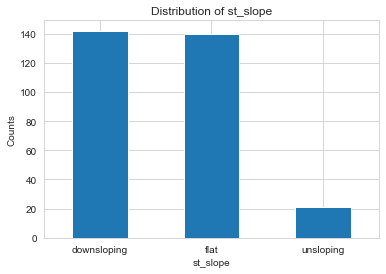

In [40]:
count_plot_col('st_slope')

##### Almost same number of people are having flat and downsloping ST slope.

#### Distribution of Number of Major Vessels

In [41]:
df_data['major_vessels'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: major_vessels, dtype: int64

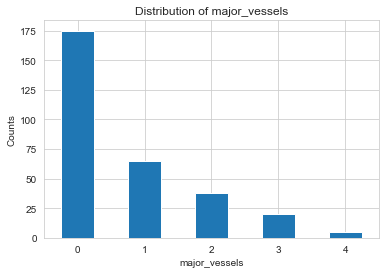

In [42]:
count_plot_col('major_vessels')

##### Most of the people are having 0 Major Vessels.

#### Distribution of Chest Pain Type

In [43]:
df_data['chest_pain_type'].value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

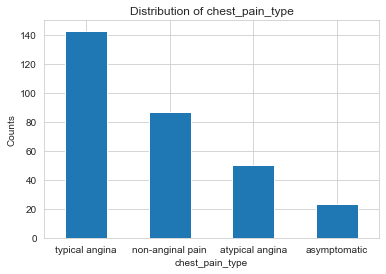

In [44]:
count_plot_col('chest_pain_type')

##### Maximum number of people are having Chest pain type as Typical Angina. And least number of people are having asymptomatic Chest pain type.

#### Distribution of Exercise Induced Angina

In [45]:
df_data['exercise_induced_angina'].value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

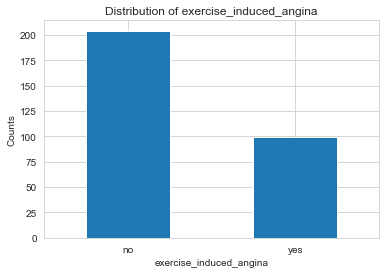

In [46]:
count_plot_col('exercise_induced_angina')

##### Most of the people are not having any Exercise induced angina.

#### 11. The occurrence of CVD across different ages

In [47]:
df_age_distribution = df_data.groupby(['age','target']).size().unstack()

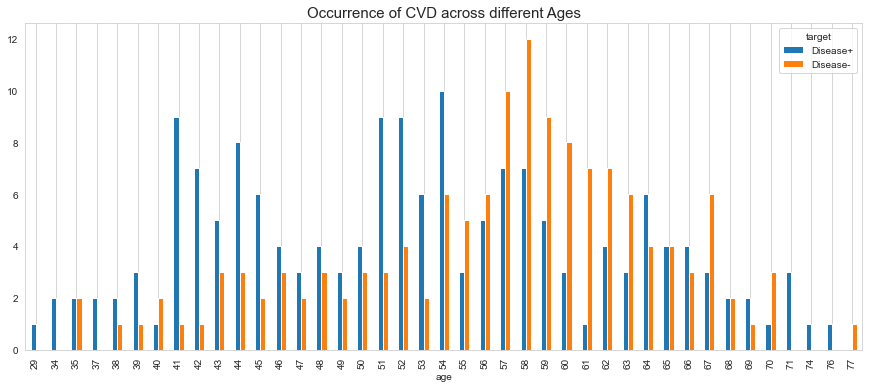

In [48]:
df_age_distribution.plot(kind='bar', figsize=[15,6], legend=True)
plt.title('Occurrence of CVD across different Ages', fontsize=15)
plt.grid(axis = 'y')

##### From the above graph we can conclude that:
* The people between the ages 41-45 and 51-54 are more prone to the Heart Disease. 

#### 12. Relationship between the Heart Disease and the Resting Blood Pressure

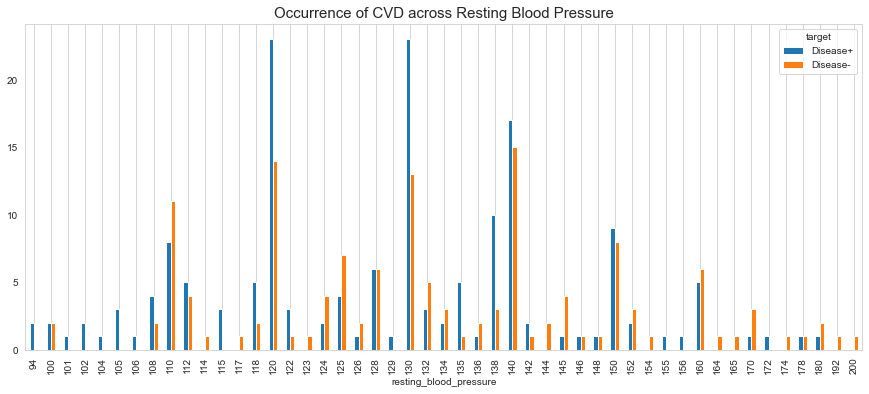

In [49]:
df_rbp_distribution = df_data.groupby(['resting_blood_pressure','target']).size().unstack()
df_rbp_distribution.plot(kind='bar', figsize=[15,6], legend=True)
plt.title('Occurrence of CVD across Resting Blood Pressure', fontsize=15)
plt.grid(axis = 'y')

##### From the above plot, we can conclude that:
* The Heart Disease are more for the people with Resting blood pressure 120 and 130. Few people with Resting Blood Pressure 140 are also prone to heart disease. Hence, there is no clear relationship between the Heart Disease and the Resting Blood Pressure.

In [50]:
def pie_bar_plot(column, num):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    str = "Overall " + column + " Distribution"
    plt.title(str, fontsize=15, y=1.0)
    if num==2:
        df_data[column].value_counts().plot(kind='pie',
                                   autopct='%1.2f%%',  
                                   colors=['pink','green','red'],explode=[0.01, 0.01])
    else:
        df_data[column].value_counts().plot(kind='pie',
                                   autopct='%1.2f%%',  
                                   colors=['pink','green','red'],
                                   explode=[0.01, 0.01, 0.01])

    plt.subplot(1,2,2)
    str = "Heart Disease by " + column
    plt.title(str, fontsize=15, y=1.0)
    sns.countplot(x=column, hue='target', data=df_data)

#### 13. Study of the composition of overall Patients with respect to gender

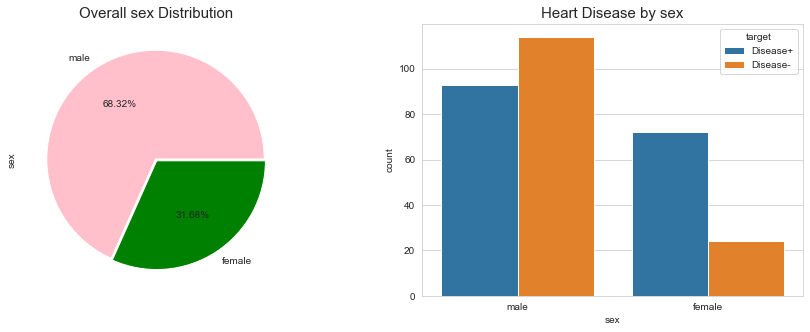

In [51]:
pie_bar_plot('sex',2)

##### From the above graphs, we can conclude that:
* The females are more prone to the Heart Disease.

<AxesSubplot:xlabel='target', ylabel='cholesterol'>

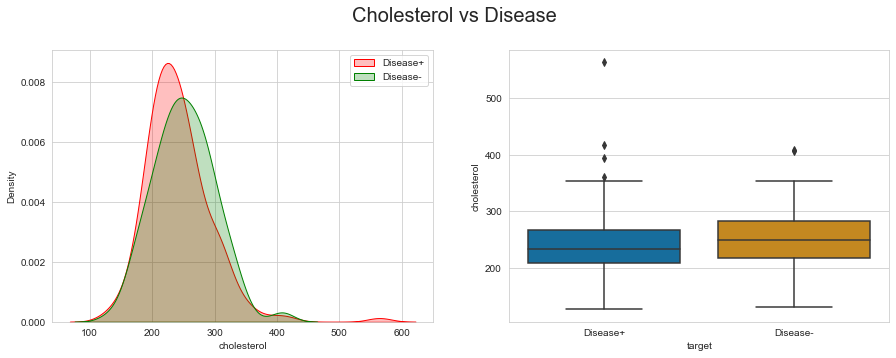

In [52]:
plt.figure(figsize = (15,5))
plt.suptitle("Cholesterol vs Disease ", fontsize=20, y=1.0)
plt.subplot(1,2,1)
sns.kdeplot(df_data.cholesterol[df_data.target=='Disease+'], 
            shade=True, color="r", label='Disease+')
sns.kdeplot(df_data.cholesterol[df_data.target=='Disease-'], 
            shade=True, color="g", label='Disease-')
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y='cholesterol', x='target', 
                 data=df_data, 
                 palette="colorblind")

##### From the above graph, we can conclude that:
* Cholesterol level of the Diseased and Healthy people are more or less in the same ranges so it is not very clear about the relationship of the Cholesterol level and the occurrence of disease.

#### 14. Determining the relationship between peak exercising and occurrence of heart attack

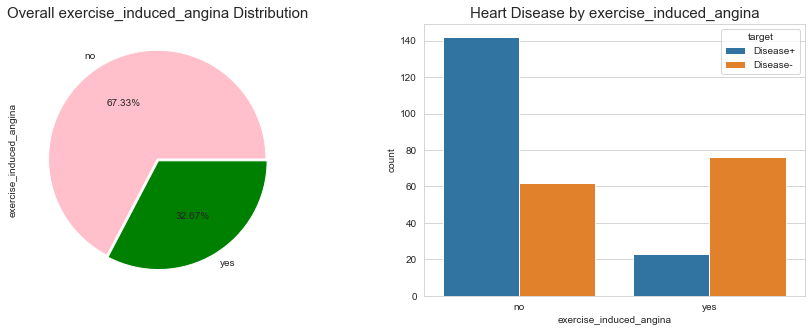

In [53]:
pie_bar_plot('exercise_induced_angina',2)

##### From the above graph, we can conclude that:
1. Around 67% people are not having exercise induced angina.
2. The possibility of the occurrence of Disease is more for the people having no Exercise Induced Angina.

#### 15. Determining the relationship between Thalessimia and occurrence of heart disease

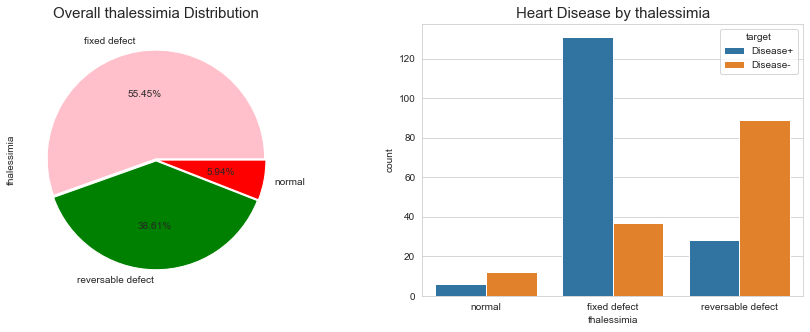

In [54]:
pie_bar_plot('thalessimia',3)

##### From the above graph, we can conclude that 
1. About 55% of the people are having fixed defect Thalessimia.
2. The people with fixed defect Thalessimia are more prone to Heart Disease. Also, the people with reversible defect Thalessimia are mostly Healthy.

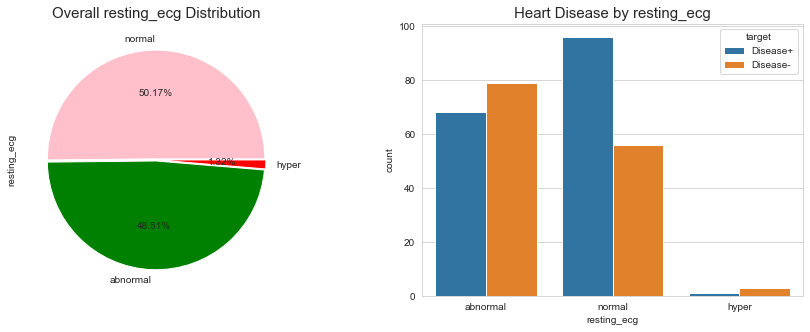

In [55]:
pie_bar_plot('resting_ecg',3)

##### From the above graphs, we can conclude that 
1. 50% of the people are having normal resting ecg.
2. The people with normal resting ecg are more prone to Heart Disease. This conclusion we can draw for this sample data but that might not be the case in real.

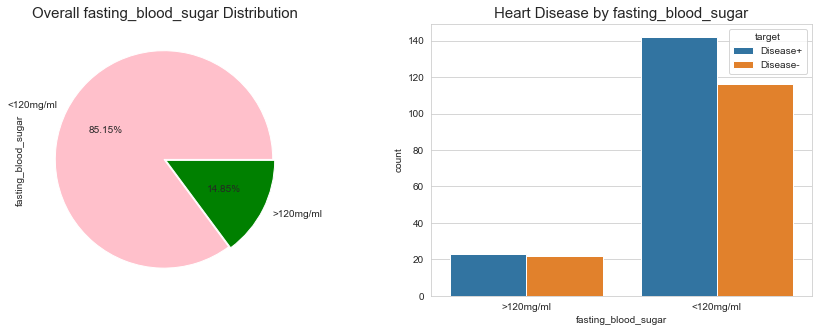

In [56]:
pie_bar_plot('fasting_blood_sugar',2)

##### From the above graphs, we can conclude that:
1. Around 85% of the people are having fasting blood sugar less than 120mg/ml.
2. The people with fasting blood sugar less than 120mg/ml are more prone to Heart Disease. And people with fasting blood sugar greater than 120mg/ml may or may not have Heart Disease.

#### 16. Use a pair plot to understand the relationship between all the given variables.

In [57]:
# Finding the correlation among the columns using pearson method
df_data.corr(method ='pearson')

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels
age,1.000,0.279,0.214,-0.399,0.210,0.276
resting_blood_pressure,0.279,1.000,0.123,-0.047,0.193,0.101
cholesterol,0.214,0.123,1.000,-0.010,0.054,0.071
max_heart_rate,-0.399,-0.047,-0.010,1.000,-0.344,-0.213
st_depression,0.210,0.193,0.054,-0.344,1.000,0.223
major_vessels,0.276,0.101,0.071,-0.213,0.223,1.000


##### From the correlation matrix we can conclude that:
1. Age is negatively correlated with maximum heart rate.
2. Resting Blood Pressure is positively correlated with age.
3. Cholesterol is positively correlated with age.
4. Maximum Heart Rate is negatively correlated with ST Depression.
5. Major vessels is positively correlated with age.

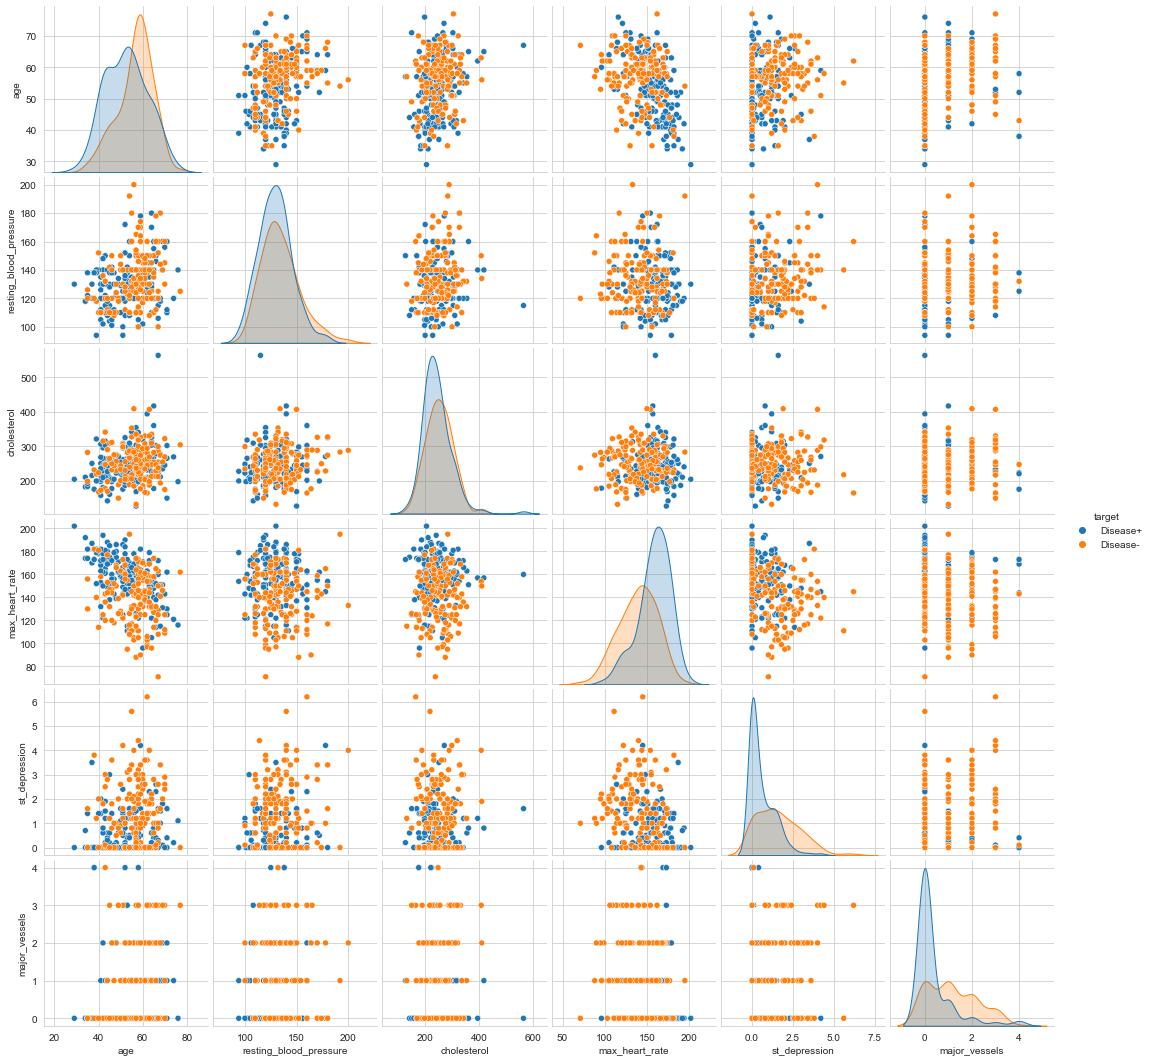

In [58]:
sns.pairplot(df_data, hue='target')

#### 17. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [59]:
# Removing the target column from the Category column list so that the dummy columns 
# are not created for it.
cat_cols.remove('target')
df_model = pd.get_dummies(df_data, columns=cat_cols)
df_model.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,target,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,st_slope_flat,st_slope_unsloping,major_vessels_0,major_vessels_1,major_vessels_2,major_vessels_3,major_vessels_4,thalessimia_fixed defect,thalessimia_normal,thalessimia_reversable defect
0,63,145,233,150,2.300,Disease+,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0
1,37,130,250,187,3.500,Disease+,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
2,41,130,204,172,1.400,Disease+,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,56,120,236,178,0.800,Disease+,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,57,120,354,163,0.600,Disease+,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [60]:
#Again converting the target column to 0 and 1
df_model.loc[df_model.target == 'Disease+' , 'target'] = 1 
df_model.loc[df_model.target == 'Disease-' , 'target'] = 0 
df_model['target']=df_model['target'].astype('int')

In [61]:
df_model.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'target', 'sex_female', 'sex_male',
       'chest_pain_type_asymptomatic', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_<120mg/ml', 'fasting_blood_sugar_>120mg/ml',
       'resting_ecg_abnormal', 'resting_ecg_hyper', 'resting_ecg_normal',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_unsloping',
       'major_vessels_0', 'major_vessels_1', 'major_vessels_2',
       'major_vessels_3', 'major_vessels_4', 'thalessimia_fixed defect',
       'thalessimia_normal', 'thalessimia_reversable defect'],
      dtype='object')

In [62]:
# Getting the name of the feature columns
col_names = df_model.columns
col_names.astype('str')
col_names=col_names.tolist()
col_names.remove('target')
feature_cols = col_names

In [63]:
X = df_model[feature_cols] # Features
y = df_model.target # Target variable

In [64]:
# Breaking the data into train and test in 70, 30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(212, 29)

(91, 29)

(212,)

(91,)

In [65]:
logisticreg = LogisticRegression(C=10,intercept_scaling=1,
                                 solver='saga',max_iter=100000) 
# fit the model with data
logisticreg.fit(X_train,y_train)
y_pred=logisticreg.predict(X_test)

In [66]:
# Creating the confusion matrix for the model
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[37,  9],
       [ 3, 42]])

Text(0.5, 257.44, 'Predicted label')

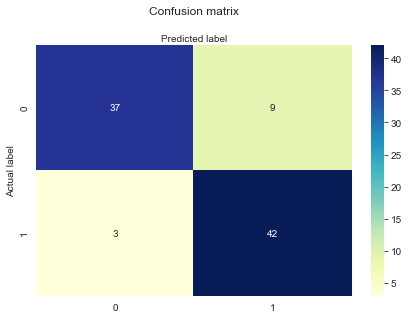

In [67]:
# Visualize the Confusion Matrix as a Heat map plot
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [68]:
# Displaying the Accuracy, Precision and Recall of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8681318681318682
Precision: 0.8235294117647058
Recall: 0.9333333333333333


##### Accuracy of the model is about 87% and the Precision of the model is 82%. Hence, the model seems to be a good fit.

#### 18. Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs a Healthy person.

##### Link to the Tableau Public Dashboard : 

https://public.tableau.com/views/HealthcareProjectDashboard_16206736167050/Overview?:language=en-GB&:display_count=y&:origin=viz_share_link